# Решение задачи подключения (CP)

Первой задачей, которую необходимо решить - является задача подключения. В ней неоходимо найти граф, в котором будут выполнены ограничения на количество передатчиков, и который будет соответствовать любой базовой структуре матрицы трафика. При этом мы хотим максимизировать трафик, который проходит от источника к месту назначения только за один переход.

Для того чтобы решить поставленную задачу, загрузим некоторые библиотеки. 

In [1]:
!pip install pulp

In [2]:
!pip install pulp

In [3]:
!pip install networkx

In [4]:
import numpy as np

import scipy.linalg as sla

import pulp as pl

import matplotlib.pyplot as plt
%matplotlib inline



In [5]:
from pulp import LpMaximize, LpProblem, LpStatus, lpSum, LpVariable

Чтобы было удобнее работать - заранее напишем функции, которые будут рисовать ориентированный граф и матрицу соответственно.

In [6]:
import matplotlib.pyplot as plt
import networkx as nx

def print_graph(m_edges):
    
    G=nx.DiGraph()  # создаём объект графа

    # определяем список узлов (ID узлов)
    nodes = [0, 1, 2, 3, 4, 5, 6, 7]

    # добавляем информацию в объект графа
    # G.add_nodes(nodes)
    G.add_nodes_from(nodes)
    G.add_edges_from(m_edges)

    # рисуем граф и отображаем его
    pos = nx.circular_layout(G)
    nx.draw_networkx(G, pos, with_labels = True)

    plt.show()

In [7]:
def print_matrix(matrix):
    print("  ", end = " ")
    for i in range (0, 8):
        print(i, end = "    ")

    print('\n')
    for i in range (0, 8) :
        print (i, end = "  ")

        for j in range (0, 8):
            print(matrix[i][j], end = "  ")
        print('\n')

Проблема подключения формируется следующим образом:

$$ maximise \displaystyle\sum_{i, j} \lambda_{ij} z_{ij}$$

$$ \displaystyle\sum_{i} z_{ij} = T,  \text{ }     \forall i $$ 

$$ \displaystyle\sum_{j} z_{ij} = T,  \text{ }     \forall j $$

$$ z_{ij} \in [0 , 1], \text{   }   \forall i, j $$

Это очень подходит под определение симплекс-метода, поэтому эту проблему можно решить с помощью линейного программирования. При этом при таких ограничениях, значения $z_{ij}$ будут являться целыим числами, в нашем случае либо 0, либо 1.

Теперь рассматрим каждую матрицу, данную в статье, и нарисуем для них графы.

1. Первая матрица - A completely uniform traffic matrix. 

Матрица, которая полностью состоит из единиц.

In [8]:
matrix = np.loadtxt('/Users/ekaterina/Desktop/Курсач/uniform_m.txt', delimiter=',')

print("completely uniform traffic matrix \n")

print_matrix(matrix)


completely uniform traffic matrix 

   0    1    2    3    4    5    6    7    

0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  

1  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  

2  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  

3  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  

4  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  

5  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  

6  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  

7  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  



Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Users/ekaterina/anaconda3/lib/python3.10/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/fc/5dflbd1546l_98wkfzjyx7rw0000gn/T/212848a3c53247d18706c768c126e9b9-pulp.mps -max -timeMode elapsed -branch -printingOptions all -solution /var/folders/fc/5dflbd1546l_98wkfzjyx7rw0000gn/T/212848a3c53247d18706c768c126e9b9-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 149 COLUMNS
At line 470 RHS
At line 615 BOUNDS
At line 616 ENDATA
Problem MODEL has 144 rows, 64 columns and 256 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Presolve 16 (-128) rows, 64 (0) columns and 128 (-128) elements
Perturbing problem by 0.001% of 1 - largest nonzero change 5.4770087e-05 ( 0.0054770087%) - largest zero change 0
0  Obj -0 Primal inf 31.999984 (16) Dual inf 63.9972 (64)
21  Obj 15.999432
Optimal - objective value 16
After Postsolve, o

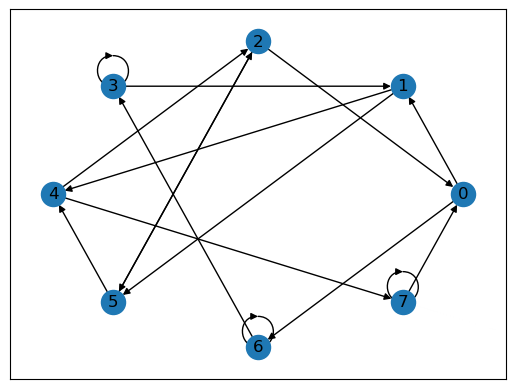

In [10]:
n_model = LpProblem(name="test_problem", sense=LpMaximize)
matrix = np.loadtxt('/Users/ekaterina/Desktop/Курсач/uniform_m.txt', delimiter=',')

unknown = []
list_of_names = ["z00", "z01", "z02", "z03", "z04", "z05", "z06", "z07",
                 "z10", "z11", "z12", "z13", "z14", "z15", "z16", "z17",
                 "z20", "z21", "z22", "z23", "z24", "z25", "z26", "z27",
                 "z30", "z31", "z32", "z33", "z34", "z35", "z36", "z37",
                 "z40", "z41", "z42", "z43", "z44", "z45", "z46", "z47",
                 "z50", "z51", "z52", "z53", "z54", "z55", "z56", "z57",
                 "z60", "z61", "z62", "z63", "z64", "z65", "z66", "z67",
                 "z70", "z71", "z72", "z73", "z74", "z75", "z76", "z77"]
for i in range(64):
    unknown.append(0)
    unknown[i] = LpVariable(name=list_of_names[i], lowBound=0)
    
T = 2

names_of_lines = ["1lin", "2lin", "3lin", "4lin", "5lin", "6lin", "7lin", "8lin"]

for i in range(8):
    #формирую ограниения по стокам матрицы лямбд и неизвестных
    #print (names_of_lines[i])
    n_model += (matrix[i][0] * unknown[i * 8 + 0] + matrix[i][1] * unknown[i * 8 + 1] +
              matrix[i][2] * unknown[i * 8 + 2] + matrix[i][3] * unknown[i * 8 + 3] + 
              matrix[i][4] * unknown[i * 8 + 4] + matrix[i][5] * unknown[i * 8 + 5] + 
              matrix[i][6] * unknown[i * 8 + 6] + matrix[i][7] * unknown[i * 8 + 7] == T, names_of_lines[i])

names_of_columns = ["1co", "2co", "3co", "4co", "5co", "6co", "7co", "8co"]

for i in range(8):
    #формирую ограниения по стокам матрицы лямбд и неизвестных
    #print (names_of_lines[i])
    n_model += (matrix[0][i] * unknown[0 * 8 + i] + matrix[1][i] * unknown[1 * 8 + i] +
              matrix[2][i] * unknown[2 * 8 + i] + matrix[3][i] * unknown[3 * 8 + i] + 
              matrix[4][i] * unknown[4 * 8 + i] + matrix[5][i] * unknown[5 * 8 + i] + 
              matrix[6][i] * unknown[6 * 8 + i] + matrix[7][i] * unknown[7 * 8 + i] == T, names_of_columns[i])
    
for i in range(64):
    n_model += (unknown[i] <= 1)
    n_model += (unknown[i] >= 0)
    
n_obj_func = (matrix[0][0] * unknown[0] + matrix[0][1] * unknown[1] + 
              matrix[0][2] * unknown[2] + matrix[0][3] * unknown[3] + 
              matrix[0][4] * unknown[4] + matrix[0][5] * unknown[5] + 
              matrix[0][6] * unknown[6] + matrix[0][7] * unknown[7] +
              matrix[1][0] * unknown[8] + matrix[1][1] * unknown[9] + 
              matrix[1][2] * unknown[10] + matrix[1][3] * unknown[11] + 
              matrix[1][4] * unknown[12] + matrix[1][5] * unknown[13] + 
              matrix[1][6] * unknown[14] + matrix[1][7] * unknown[15] +
              matrix[2][0] * unknown[16] + matrix[2][1] * unknown[17] +
              matrix[2][2] * unknown[18] + matrix[2][3] * unknown[19] + 
              matrix[2][4] * unknown[20] + matrix[2][5] * unknown[21] + 
              matrix[2][6] * unknown[22] + matrix[2][7] * unknown[23] +
              matrix[3][0] * unknown[24] + matrix[3][1] * unknown[25] +
              matrix[3][2] * unknown[26] + matrix[3][3] * unknown[27] + 
              matrix[3][4] * unknown[28] + matrix[3][5] * unknown[29] + 
              matrix[3][6] * unknown[30] + matrix[3][7] * unknown[31] +
              matrix[4][0] * unknown[32] + matrix[4][1] * unknown[33] +
              matrix[4][2] * unknown[34] + matrix[4][3] * unknown[35] + 
              matrix[4][4] * unknown[36] + matrix[4][5] * unknown[37] + 
              matrix[4][6] * unknown[38] + matrix[4][7] * unknown[39] +
              matrix[5][0] * unknown[40] + matrix[5][1] * unknown[41] +
              matrix[5][2] * unknown[42] + matrix[5][3] * unknown[43] + 
              matrix[5][4] * unknown[44] + matrix[5][5] * unknown[45] + 
              matrix[5][6] * unknown[46] + matrix[5][7] * unknown[47] +
              matrix[6][0] * unknown[48] + matrix[6][1] * unknown[49] +
              matrix[6][2] * unknown[50] + matrix[6][3] * unknown[51] + 
              matrix[6][4] * unknown[52] + matrix[6][5] * unknown[53] + 
              matrix[6][6] * unknown[54] + matrix[6][7] * unknown[55] +
              matrix[7][0] * unknown[56] + matrix[7][1] * unknown[57] +
              matrix[7][2] * unknown[58] + matrix[7][3] * unknown[59] + 
              matrix[7][4] * unknown[60] + matrix[7][5] * unknown[61] + 
              matrix[7][6] * unknown[62] + matrix[7][7] * unknown[63])

n_model += n_obj_func

status = n_model.solve()

m_edges = list()

k = 0;
for var in n_model.variables():
    print(f"{var.name}: {var.value()}", end = ' ')
    if (var.value() == 1.0):
        pair = (k // 8, k % 8)
        m_edges.append(pair)
    if ((k + 1) % 8 == 0):
        print("\n")
    k += 1
        
print_graph(m_edges)

В этой матрице получился такой граф, так как матрица состоит полностью из единиц, значит необходимо только выполнить ограничение на количество приемников и передатчиков. Поэтому матрица не имеет каких-либо характерный признаков, кроме того, что из-за единиц на диагонали возможен случай, когда ребро из вершин ведет в нее же.




2. Вторая матрица - A uniform traffic matrix with zero diagonal elements. 

Матрица которая состоит из единиц, но на диагонали стоят 0.

In [11]:
n_model_2 = LpProblem(name="test_problem", sense=LpMaximize)
matrix_2 = np.loadtxt('/Users/ekaterina/Desktop/Курсач/uniform_matrix_zero.txt', delimiter=',')

print_matrix(matrix_2)

   0    1    2    3    4    5    6    7    

0  0.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  

1  1.0  0.0  1.0  1.0  1.0  1.0  1.0  1.0  

2  1.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0  

3  1.0  1.0  1.0  0.0  1.0  1.0  1.0  1.0  

4  1.0  1.0  1.0  1.0  0.0  1.0  1.0  1.0  

5  1.0  1.0  1.0  1.0  1.0  0.0  1.0  1.0  

6  1.0  1.0  1.0  1.0  1.0  1.0  0.0  1.0  

7  1.0  1.0  1.0  1.0  1.0  1.0  1.0  0.0  



Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Users/ekaterina/anaconda3/lib/python3.10/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/fc/5dflbd1546l_98wkfzjyx7rw0000gn/T/1f3f849852544cb3a783fa1e8e1ab971-pulp.mps -max -timeMode elapsed -branch -printingOptions all -solution /var/folders/fc/5dflbd1546l_98wkfzjyx7rw0000gn/T/1f3f849852544cb3a783fa1e8e1ab971-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 149 COLUMNS
At line 462 RHS
At line 607 BOUNDS
At line 608 ENDATA
Problem MODEL has 144 rows, 64 columns and 256 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Presolve 16 (-128) rows, 64 (0) columns and 128 (-128) elements
Perturbing problem by 0.001% of 1 - largest nonzero change 5.4770087e-05 ( 0.0054770087%) - largest zero change 4.4346844e-05
0  Obj -0 Primal inf 31.999984 (16) Dual inf 55.997548 (56)
30  Obj 15.999423
Optimal - objective value 16
Afte

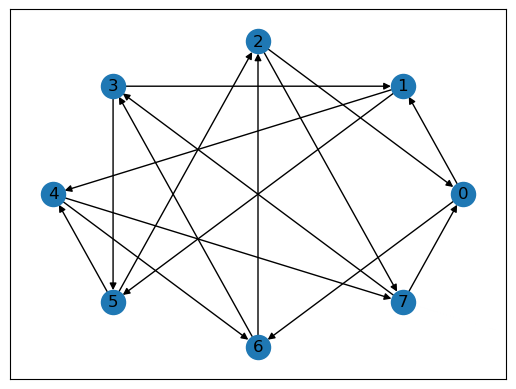

In [12]:
names_of_lines = ["1lin", "2lin", "3lin", "4lin", "5lin", "6lin", "7lin", "8lin"]

for i in range(8):
    #формирую ограниения по стокам матрицы лямбд и неизвестных
    #print (names_of_lines[i])
    n_model_2 += (unknown[i * 8 + 0] + unknown[i * 8 + 1] +
              unknown[i * 8 + 2] + unknown[i * 8 + 3] + 
              unknown[i * 8 + 4] + unknown[i * 8 + 5] + 
              unknown[i * 8 + 6] + unknown[i * 8 + 7] == T, names_of_lines[i])
    
names_of_columns = ["1co", "2co", "3co", "4co", "5co", "6co", "7co", "8co"]

for i in range(8):
    #формирую ограниения по стокам матрицы лямбд и неизвестных
    #print (names_of_lines[i])
    n_model_2 += (unknown[0 * 8 + i] + unknown[1 * 8 + i] +
              unknown[2 * 8 + i] + unknown[3 * 8 + i] + 
              unknown[4 * 8 + i] + unknown[5 * 8 + i] + 
              unknown[6 * 8 + i] + unknown[7 * 8 + i] == T, names_of_columns[i])
    
for i in range(64):
    n_model_2 += (unknown[i] <= 1)
    n_model_2 += (unknown[i] >= 0)
    
n_obj_func_2 = (matrix_2[0][0] * unknown[0] + matrix_2[0][1] * unknown[1] + 
              matrix_2[0][2] * unknown[2] + matrix_2[0][3] * unknown[3] + 
              matrix_2[0][4] * unknown[4] + matrix_2[0][5] * unknown[5] + 
              matrix_2[0][6] * unknown[6] + matrix_2[0][7] * unknown[7] +
              matrix_2[1][0] * unknown[8] + matrix_2[1][1] * unknown[9] + 
              matrix_2[1][2] * unknown[10] + matrix_2[1][3] * unknown[11] + 
              matrix_2[1][4] * unknown[12] + matrix_2[1][5] * unknown[13] + 
              matrix_2[1][6] * unknown[14] + matrix_2[1][7] * unknown[15] +
              matrix_2[2][0] * unknown[16] + matrix_2[2][1] * unknown[17] +
              matrix_2[2][2] * unknown[18] + matrix_2[2][3] * unknown[19] + 
              matrix_2[2][4] * unknown[20] + matrix_2[2][5] * unknown[21] + 
              matrix_2[2][6] * unknown[22] + matrix_2[2][7] * unknown[23] +
              matrix_2[3][0] * unknown[24] + matrix_2[3][1] * unknown[25] +
              matrix_2[3][2] * unknown[26] + matrix_2[3][3] * unknown[27] + 
              matrix_2[3][4] * unknown[28] + matrix_2[3][5] * unknown[29] + 
              matrix_2[3][6] * unknown[30] + matrix_2[3][7] * unknown[31] +
              matrix_2[4][0] * unknown[32] + matrix_2[4][1] * unknown[33] +
              matrix_2[4][2] * unknown[34] + matrix_2[4][3] * unknown[35] + 
              matrix_2[4][4] * unknown[36] + matrix_2[4][5] * unknown[37] + 
              matrix_2[4][6] * unknown[38] + matrix_2[4][7] * unknown[39] +
              matrix_2[5][0] * unknown[40] + matrix_2[5][1] * unknown[41] +
              matrix_2[5][2] * unknown[42] + matrix_2[5][3] * unknown[43] + 
              matrix_2[5][4] * unknown[44] + matrix_2[5][5] * unknown[45] + 
              matrix_2[5][6] * unknown[46] + matrix_2[5][7] * unknown[47] +
              matrix_2[6][0] * unknown[48] + matrix_2[6][1] * unknown[49] +
              matrix_2[6][2] * unknown[50] + matrix_2[6][3] * unknown[51] + 
              matrix_2[6][4] * unknown[52] + matrix_2[6][5] * unknown[53] + 
              matrix_2[6][6] * unknown[54] + matrix_2[6][7] * unknown[55] +
              matrix_2[7][0] * unknown[56] + matrix_2[7][1] * unknown[57] +
              matrix_2[7][2] * unknown[58] + matrix_2[7][3] * unknown[59] + 
              matrix_2[7][4] * unknown[60] + matrix_2[7][5] * unknown[61] + 
              matrix_2[7][6] * unknown[62] + matrix_2[7][7] * unknown[63])

n_model_2 += n_obj_func_2

status = n_model_2.solve()

m_edges = list()

k = 0;
for var in n_model_2.variables():
    print(f"{var.name}: {var.value()}", end = ' ')
#     print(k, k // 8, k % 8)
    if (var.value() == 1.0):
        pair = (k // 8, k % 8)
        m_edges.append(pair)
    if ((k + 1) % 8 == 0):
        print("\n")
    k += 1
        
print_graph(m_edges)

В этом случае матрица так же не имеет каких-либо отличительных признаков. Главное чтобы соблюдались ограничения на количество приемников и передатчиков. При этом в этом случае точно не возникнет ребер, которые идут из вершины в ту же вершину.

3. Третья матрица - A quasiuniform traffic matrix.

Это матрица которая имеет признаки однородности, т.е. ее значения колеблются около значения равного 1, а на диагонали стоят 0.

In [13]:
n_model_3 = LpProblem(name="third_matrix", sense=LpMaximize)
matrix_3 = np.loadtxt('/Users/ekaterina/Desktop/Курсач/quasiuniform _traffic_matrix.txt', delimiter=',')

print_matrix(matrix_3)

   0    1    2    3    4    5    6    7    

0  0.0  1.1  1.0  0.9  0.9  1.0  0.8  0.7  

1  0.8  0.0  0.7  1.0  1.1  1.0  0.9  0.9  

2  0.9  1.0  0.0  1.1  1.2  0.8  0.9  0.8  

3  1.1  1.1  1.0  0.0  0.7  0.8  0.9  0.9  

4  0.9  1.0  1.1  0.7  0.0  0.8  0.8  1.0  

5  1.0  0.8  0.8  0.9  1.0  0.0  1.0  1.0  

6  1.1  1.0  0.9  0.9  0.8  0.7  0.0  0.9  

7  0.8  0.8  1.0  1.0  1.1  0.9  0.9  0.0  



Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Users/ekaterina/anaconda3/lib/python3.10/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/fc/5dflbd1546l_98wkfzjyx7rw0000gn/T/97186abca45d469d9e080492b368ff86-pulp.mps -max -timeMode elapsed -branch -printingOptions all -solution /var/folders/fc/5dflbd1546l_98wkfzjyx7rw0000gn/T/97186abca45d469d9e080492b368ff86-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 149 COLUMNS
At line 462 RHS
At line 607 BOUNDS
At line 608 ENDATA
Problem MODEL has 144 rows, 64 columns and 256 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Presolve 16 (-128) rows, 64 (0) columns and 128 (-128) elements
Perturbing problem by 0.001% of 1.2 - largest nonzero change 5.3881923e-05 ( 0.0073862954%) - largest zero change 4.443466e-05
0  Obj -0 Primal inf 31.999984 (16) Dual inf 51.597561 (56)
15  Obj 16.699345
Optimal - objective value 16.7
A

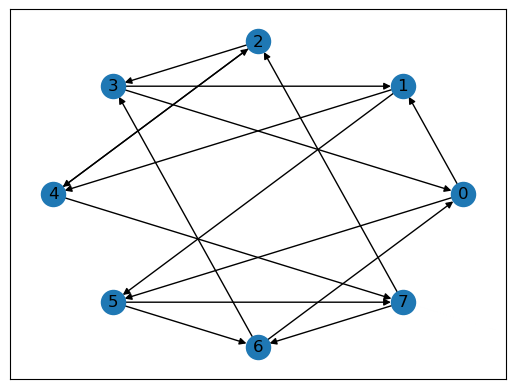

In [14]:
names_of_lines = ["1lin", "2lin", "3lin", "4lin", "5lin", "6lin", "7lin", "8lin"]
T = 2
for i in range(8):
    #формирую ограниения по стокам матрицы лямбд и неизвестных
    #print (names_of_lines[i])
    n_model_3 += (unknown[i * 8 + 0] + unknown[i * 8 + 1] +
              unknown[i * 8 + 2] + unknown[i * 8 + 3] + 
              unknown[i * 8 + 4] + unknown[i * 8 + 5] + 
              unknown[i * 8 + 6] + unknown[i * 8 + 7] == T, names_of_lines[i])
    
names_of_columns = ["1co", "2co", "3co", "4co", "5co", "6co", "7co", "8co"]

for i in range(8):
    #формирую ограниения по стокам матрицы лямбд и неизвестных
    #print (names_of_lines[i])
    n_model_3 += (unknown[0 * 8 + i] + unknown[1 * 8 + i] +
              unknown[2 * 8 + i] + unknown[3 * 8 + i] + 
              unknown[4 * 8 + i] + unknown[5 * 8 + i] + 
              unknown[6 * 8 + i] + unknown[7 * 8 + i] == T, names_of_columns[i])
    
for i in range(64):
    n_model_3 += (unknown[i] <= 1)
    n_model_3 += (unknown[i] >= 0)
    
n_obj_func_3 = (matrix_3[0][0] * unknown[0] + matrix_3[0][1] * unknown[1] + 
              matrix_3[0][2] * unknown[2] + matrix_3[0][3] * unknown[3] + 
              matrix_3[0][4] * unknown[4] + matrix_3[0][5] * unknown[5] + 
              matrix_3[0][6] * unknown[6] + matrix_3[0][7] * unknown[7] +
              matrix_3[1][0] * unknown[8] + matrix_3[1][1] * unknown[9] + 
              matrix_3[1][2] * unknown[10] + matrix_3[1][3] * unknown[11] + 
              matrix_3[1][4] * unknown[12] + matrix_3[1][5] * unknown[13] + 
              matrix_3[1][6] * unknown[14] + matrix_3[1][7] * unknown[15] +
              matrix_3[2][0] * unknown[16] + matrix_3[2][1] * unknown[17] +
              matrix_3[2][2] * unknown[18] + matrix_3[2][3] * unknown[19] + 
              matrix_3[2][4] * unknown[20] + matrix_3[2][5] * unknown[21] + 
              matrix_3[2][6] * unknown[22] + matrix_3[2][7] * unknown[23] +
              matrix_3[3][0] * unknown[24] + matrix_3[3][1] * unknown[25] +
              matrix_3[3][2] * unknown[26] + matrix_3[3][3] * unknown[27] + 
              matrix_3[3][4] * unknown[28] + matrix_3[3][5] * unknown[29] + 
              matrix_3[3][6] * unknown[30] + matrix_3[3][7] * unknown[31] +
              matrix_3[4][0] * unknown[32] + matrix_3[4][1] * unknown[33] +
              matrix_3[4][2] * unknown[34] + matrix_3[4][3] * unknown[35] + 
              matrix_3[4][4] * unknown[36] + matrix_3[4][5] * unknown[37] + 
              matrix_3[4][6] * unknown[38] + matrix_3[4][7] * unknown[39] +
              matrix_3[5][0] * unknown[40] + matrix_3[5][1] * unknown[41] +
              matrix_3[5][2] * unknown[42] + matrix_3[5][3] * unknown[43] + 
              matrix_3[5][4] * unknown[44] + matrix_3[5][5] * unknown[45] + 
              matrix_3[5][6] * unknown[46] + matrix_3[5][7] * unknown[47] +
              matrix_3[6][0] * unknown[48] + matrix_3[6][1] * unknown[49] +
              matrix_3[6][2] * unknown[50] + matrix_3[6][3] * unknown[51] + 
              matrix_3[6][4] * unknown[52] + matrix_3[6][5] * unknown[53] + 
              matrix_3[6][6] * unknown[54] + matrix_3[6][7] * unknown[55] +
              matrix_3[7][0] * unknown[56] + matrix_3[7][1] * unknown[57] +
              matrix_3[7][2] * unknown[58] + matrix_3[7][3] * unknown[59] + 
              matrix_3[7][4] * unknown[60] + matrix_3[7][5] * unknown[61] + 
              matrix_3[7][6] * unknown[62] + matrix_3[7][7] * unknown[63])

n_model_3 += n_obj_func_3

status = n_model_3.solve()

m_edges = list()

k = 0;
for var in n_model_3.variables():
    print(f"{var.name}: {var.value()}", end = ' ')
    if (var.value() == 1.0):
        pair = (k // 8, k % 8)
        m_edges.append(pair)
    if ((k + 1) % 8 == 0):
        print("\n")
    k += 1
        
print_graph(m_edges)

В итоге мы получили граф, в котором ребра из вершины идут в те вершины, которые имеют наибольшее значение в матрице траффика между этими вершинами. Конечно эти значения не для всех вершин максимальны, однако выбираются максимально возможные значения, чтобы учитывались ограничения на применики и передатчики.

4. Четвертая матрица - A ring type trafic matrix.

Это матрица, в которой максимальный траффик распределен последовательно между вершинами в порядке:

0 -> 1 -> 2 -> 3 -> 4 -> 5 -> 6 -> 7 -> 0, поэтому ожидается такая же кольцевая структура в графе.

In [15]:
n_model_4 = LpProblem(name="third_matrix", sense=LpMaximize)
matrix_4 = np.loadtxt('/Users/ekaterina/Desktop/Курсач/ring_type_trafic_matrix.txt', delimiter=',')

print_matrix(matrix_4)

   0    1    2    3    4    5    6    7    

0  0.0  10.0  0.9  1.0  0.8  1.0  1.1  0.8  

1  0.9  0.0  11.0  0.9  1.0  1.0  0.8  1.0  

2  1.1  0.9  0.0  8.0  0.8  0.9  1.0  0.9  

3  1.1  1.0  1.0  0.0  9.0  0.9  0.9  1.0  

4  0.8  1.0  0.8  0.9  0.0  10.0  1.1  0.9  

5  0.9  0.9  1.0  1.0  0.9  0.0  12.0  1.1  

6  0.8  1.1  1.1  1.0  0.8  0.9  0.0  9.0  

7  11.0  0.9  0.8  0.7  1.0  1.1  0.8  0.0  



Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Users/ekaterina/anaconda3/lib/python3.10/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/fc/5dflbd1546l_98wkfzjyx7rw0000gn/T/a285d33b5cc34553a898c5f7972c53be-pulp.mps -max -timeMode elapsed -branch -printingOptions all -solution /var/folders/fc/5dflbd1546l_98wkfzjyx7rw0000gn/T/a285d33b5cc34553a898c5f7972c53be-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 149 COLUMNS
At line 462 RHS
At line 607 BOUNDS
At line 608 ENDATA
Problem MODEL has 144 rows, 64 columns and 256 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Presolve 16 (-128) rows, 64 (0) columns and 128 (-128) elements
Perturbing problem by 0.001% of 12 - largest nonzero change 0.0001041382 ( 0.0079114219%) - largest zero change 4.9176698e-05
0  Obj -0 Primal inf 31.999984 (16) Dual inf 124.99704 (56)
16  Obj 88.49897
Optimal - objective value 88.5
Aft

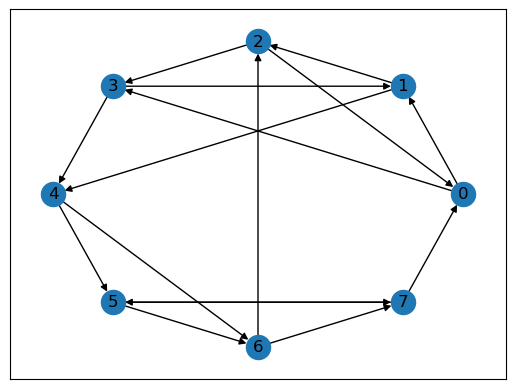

In [16]:
names_of_lines = ["1lin", "2lin", "3lin", "4lin", "5lin", "6lin", "7lin", "8lin"]
T = 2
for i in range(8):
    #формирую ограниения по стокам матрицы лямбд и неизвестных
    #print (names_of_lines[i])
    n_model_4 += (unknown[i * 8 + 0] + unknown[i * 8 + 1] +
              unknown[i * 8 + 2] + unknown[i * 8 + 3] + 
              unknown[i * 8 + 4] + unknown[i * 8 + 5] + 
              unknown[i * 8 + 6] + unknown[i * 8 + 7] == T, names_of_lines[i])
    
names_of_columns = ["1co", "2co", "3co", "4co", "5co", "6co", "7co", "8co"]

for i in range(8):
    #формирую ограниения по стокам матрицы лямбд и неизвестных
    #print (names_of_lines[i])
    n_model_4 += (unknown[0 * 8 + i] + unknown[1 * 8 + i] +
              unknown[2 * 8 + i] + unknown[3 * 8 + i] + 
              unknown[4 * 8 + i] + unknown[5 * 8 + i] + 
              unknown[6 * 8 + i] + unknown[7 * 8 + i] == T, names_of_columns[i])
    
for i in range(64):
    n_model_4 += (unknown[i] <= 1)
    n_model_4 += (unknown[i] >= 0)
    
n_obj_func_4 = (matrix_4[0][0] * unknown[0] + matrix_4[0][1] * unknown[1] + 
              matrix_4[0][2] * unknown[2] + matrix_4[0][3] * unknown[3] + 
              matrix_4[0][4] * unknown[4] + matrix_4[0][5] * unknown[5] + 
              matrix_4[0][6] * unknown[6] + matrix_4[0][7] * unknown[7] +
              matrix_4[1][0] * unknown[8] + matrix_4[1][1] * unknown[9] + 
              matrix_4[1][2] * unknown[10] + matrix_4[1][3] * unknown[11] + 
              matrix_4[1][4] * unknown[12] + matrix_4[1][5] * unknown[13] + 
              matrix_4[1][6] * unknown[14] + matrix_4[1][7] * unknown[15] +
              matrix_4[2][0] * unknown[16] + matrix_4[2][1] * unknown[17] +
              matrix_4[2][2] * unknown[18] + matrix_4[2][3] * unknown[19] + 
              matrix_4[2][4] * unknown[20] + matrix_4[2][5] * unknown[21] + 
              matrix_4[2][6] * unknown[22] + matrix_4[2][7] * unknown[23] +
              matrix_4[3][0] * unknown[24] + matrix_4[3][1] * unknown[25] +
              matrix_4[3][2] * unknown[26] + matrix_4[3][3] * unknown[27] + 
              matrix_4[3][4] * unknown[28] + matrix_4[3][5] * unknown[29] + 
              matrix_4[3][6] * unknown[30] + matrix_4[3][7] * unknown[31] +
              matrix_4[4][0] * unknown[32] + matrix_4[4][1] * unknown[33] +
              matrix_4[4][2] * unknown[34] + matrix_4[4][3] * unknown[35] + 
              matrix_4[4][4] * unknown[36] + matrix_4[4][5] * unknown[37] + 
              matrix_4[4][6] * unknown[38] + matrix_4[4][7] * unknown[39] +
              matrix_4[5][0] * unknown[40] + matrix_4[5][1] * unknown[41] +
              matrix_4[5][2] * unknown[42] + matrix_4[5][3] * unknown[43] + 
              matrix_4[5][4] * unknown[44] + matrix_4[5][5] * unknown[45] + 
              matrix_4[5][6] * unknown[46] + matrix_4[5][7] * unknown[47] +
              matrix_4[6][0] * unknown[48] + matrix_4[6][1] * unknown[49] +
              matrix_4[6][2] * unknown[50] + matrix_4[6][3] * unknown[51] + 
              matrix_4[6][4] * unknown[52] + matrix_4[6][5] * unknown[53] + 
              matrix_4[6][6] * unknown[54] + matrix_4[6][7] * unknown[55] +
              matrix_4[7][0] * unknown[56] + matrix_4[7][1] * unknown[57] +
              matrix_4[7][2] * unknown[58] + matrix_4[7][3] * unknown[59] + 
              matrix_4[7][4] * unknown[60] + matrix_4[7][5] * unknown[61] + 
              matrix_4[7][6] * unknown[62] + matrix_4[7][7] * unknown[63])

n_model_4 += n_obj_func_4

status = n_model_4.solve()

m_edges = list()

k = 0;
for var in n_model_4.variables():
    print(f"{var.name}: {var.value()}", end = ' ')
    if (var.value() == 1.0):
        pair = (k // 8, k % 8)
        m_edges.append(pair)
    if ((k + 1) % 8 == 0):
        print("\n")
    k += 1
        
print_graph(m_edges)

Как мы и предполагали, граф имеет кольцевую структуру, а остальные ребра идут в вершины со значениями, которые имеют максимально возможные значения траффика, при данных ограничениях.

5. Пятая матрица - A centralized type traffic matrix.

В этой матрице максимальные значения концентрируются около 0 вершины. Причем максимальные значения траффика принадлежат ребрам от вершины 0 и к вершине 0.

In [17]:
n_model_5 = LpProblem(name="forht_matrix", sense=LpMaximize)
matrix_5 = np.loadtxt('/Users/ekaterina/Desktop/Курсач/centralized_type_traffic_matrix.txt', delimiter=',')

print_matrix(matrix_5)

   0    1    2    3    4    5    6    7    

0  0.0  10.0  8.0  7.0  11.0  9.0  11.0  10.0  

1  12.0  0.0  0.8  1.0  0.9  1.0  1.0  0.9  

2  8.0  1.1  0.0  0.7  0.9  1.0  1.1  1.0  

3  9.0  1.0  1.1  0.0  0.8  0.8  0.7  0.9  

4  10.0  0.9  1.0  0.9  0.0  0.9  1.0  1.1  

5  9.0  1.1  0.8  1.1  1.1  0.0  1.0  0.9  

6  11.0  0.8  0.9  0.9  1.0  1.0  0.0  0.7  

7  8.0  0.7  1.0  1.1  0.8  0.8  0.9  0.0  



Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Users/ekaterina/anaconda3/lib/python3.10/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/fc/5dflbd1546l_98wkfzjyx7rw0000gn/T/fbb68b100cae43b29a455037616f46b8-pulp.mps -max -timeMode elapsed -branch -printingOptions all -solution /var/folders/fc/5dflbd1546l_98wkfzjyx7rw0000gn/T/fbb68b100cae43b29a455037616f46b8-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 149 COLUMNS
At line 462 RHS
At line 607 BOUNDS
At line 608 ENDATA
Problem MODEL has 144 rows, 64 columns and 256 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Presolve 16 (-128) rows, 64 (0) columns and 128 (-128) elements
Perturbing problem by 0.001% of 12 - largest nonzero change 0.00010695945 ( 0.0075033765%) - largest zero change 4.9176698e-05
0  Obj -0 Primal inf 31.999984 (16) Dual inf 172.09688 (56)
17  Obj 57.599096
Optimal - objective value 57.6
A

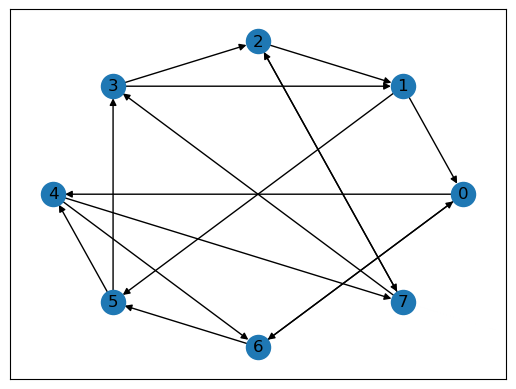

In [18]:
names_of_lines = ["1lin", "2lin", "3lin", "4lin", "5lin", "6lin", "7lin", "8lin"]
T = 2
for i in range(8):
    #формирую ограниения по стокам матрицы лямбд и неизвестных
    #print (names_of_lines[i])
    n_model_5 += (unknown[i * 8 + 0] + unknown[i * 8 + 1] +
              unknown[i * 8 + 2] + unknown[i * 8 + 3] + 
              unknown[i * 8 + 4] + unknown[i * 8 + 5] + 
              unknown[i * 8 + 6] + unknown[i * 8 + 7] == T, names_of_lines[i])
    
names_of_columns = ["1co", "2co", "3co", "4co", "5co", "6co", "7co", "8co"]

for i in range(8):
    #формирую ограниения по стокам матрицы лямбд и неизвестных
    #print (names_of_lines[i])
    n_model_5 += (unknown[0 * 8 + i] + unknown[1 * 8 + i] +
              unknown[2 * 8 + i] + unknown[3 * 8 + i] + 
              unknown[4 * 8 + i] + unknown[5 * 8 + i] + 
              unknown[6 * 8 + i] + unknown[7 * 8 + i] == T, names_of_columns[i])
    
for i in range(64):
    n_model_5 += (unknown[i] <= 1)
    n_model_5 += (unknown[i] >= 0)
    
n_obj_func_5 = (matrix_5[0][0] * unknown[0] + matrix_5[0][1] * unknown[1] + 
              matrix_5[0][2] * unknown[2] + matrix_5[0][3] * unknown[3] + 
              matrix_5[0][4] * unknown[4] + matrix_5[0][5] * unknown[5] + 
              matrix_5[0][6] * unknown[6] + matrix_5[0][7] * unknown[7] +
              matrix_5[1][0] * unknown[8] + matrix_5[1][1] * unknown[9] + 
              matrix_5[1][2] * unknown[10] + matrix_5[1][3] * unknown[11] + 
              matrix_5[1][4] * unknown[12] + matrix_5[1][5] * unknown[13] + 
              matrix_5[1][6] * unknown[14] + matrix_5[1][7] * unknown[15] +
              matrix_5[2][0] * unknown[16] + matrix_5[2][1] * unknown[17] +
              matrix_5[2][2] * unknown[18] + matrix_5[2][3] * unknown[19] + 
              matrix_5[2][4] * unknown[20] + matrix_5[2][5] * unknown[21] + 
              matrix_5[2][6] * unknown[22] + matrix_5[2][7] * unknown[23] +
              matrix_5[3][0] * unknown[24] + matrix_5[3][1] * unknown[25] +
              matrix_5[3][2] * unknown[26] + matrix_5[3][3] * unknown[27] + 
              matrix_5[3][4] * unknown[28] + matrix_5[3][5] * unknown[29] + 
              matrix_5[3][6] * unknown[30] + matrix_5[3][7] * unknown[31] +
              matrix_5[4][0] * unknown[32] + matrix_5[4][1] * unknown[33] +
              matrix_5[4][2] * unknown[34] + matrix_5[4][3] * unknown[35] + 
              matrix_5[4][4] * unknown[36] + matrix_5[4][5] * unknown[37] + 
              matrix_5[4][6] * unknown[38] + matrix_5[4][7] * unknown[39] +
              matrix_5[5][0] * unknown[40] + matrix_5[5][1] * unknown[41] +
              matrix_5[5][2] * unknown[42] + matrix_5[5][3] * unknown[43] + 
              matrix_5[5][4] * unknown[44] + matrix_5[5][5] * unknown[45] + 
              matrix_5[5][6] * unknown[46] + matrix_5[5][7] * unknown[47] +
              matrix_5[6][0] * unknown[48] + matrix_5[6][1] * unknown[49] +
              matrix_5[6][2] * unknown[50] + matrix_5[6][3] * unknown[51] + 
              matrix_5[6][4] * unknown[52] + matrix_5[6][5] * unknown[53] + 
              matrix_5[6][6] * unknown[54] + matrix_5[6][7] * unknown[55] +
              matrix_5[7][0] * unknown[56] + matrix_5[7][1] * unknown[57] +
              matrix_5[7][2] * unknown[58] + matrix_5[7][3] * unknown[59] + 
              matrix_5[7][4] * unknown[60] + matrix_5[7][5] * unknown[61] + 
              matrix_5[7][6] * unknown[62] + matrix_5[7][7] * unknown[63])

n_model_5 += n_obj_func_5

status = n_model_5.solve()

m_edges = list()

k = 0;
for var in n_model_5.variables():
    print(f"{var.name}: {var.value()}", end = ' ')
    if (var.value() == 1.0):
        pair = (k // 8, k % 8)
        m_edges.append(pair)
    if ((k + 1) % 8 == 0):
        print("\n")
    k += 1
        
print_graph(m_edges)

В этом графе от нулевой вершины и в нулевую вершину ребра идут по максимальным значениям траффика. В остальных вершинах (подматрице от вершин 1 - 7) ребра также идут по максимально возможным значениям траффика, ровно как в квазиоднородной матрице.

6. Шестая матрица - A disconnected type traffic matrix.

Эта матрица имеет две компоненты сильной связности, т.е. граф имеет два множества вершин, каждое из которых имеет большие значения траффика только с вершинами из множества, в котором она находится. Поэтому ожидается, что граф будет иметь две компоненты связности, а внутри каждой из компонент матрица будет вести себя как в случае с квазиоднородной матрицей.

In [19]:
n_model_6 = LpProblem(name="forht_matrix", sense=LpMaximize)
matrix_6 = np.loadtxt('/Users/ekaterina/Desktop/Курсач/disconnected_type_traffic_matrix.txt', delimiter=',')

print_matrix(matrix_6)

   0    1    2    3    4    5    6    7    

0  0.0  10.0  11.0  9.0  0.9  0.8  1.0  1.0  

1  9.0  0.0  11.0  9.0  1.0  0.8  1.0  0.9  

2  10.0  12.0  0.0  8.0  0.9  0.9  1.1  1.0  

3  8.0  9.0  10.0  0.0  1.1  1.0  0.8  0.7  

4  0.7  0.8  1.1  1.0  0.0  10.0  11.0  8.0  

5  1.2  0.8  0.9  0.9  9.0  0.0  9.0  8.0  

6  0.8  1.1  1.0  1.1  10.0  11.0  0.0  11.0  

7  0.9  1.1  1.0  1.0  11.0  8.0  9.0  0.0  



Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Users/ekaterina/anaconda3/lib/python3.10/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/fc/5dflbd1546l_98wkfzjyx7rw0000gn/T/c22fd8a7af8c4aaa8eba11a39219ff83-pulp.mps -max -timeMode elapsed -branch -printingOptions all -solution /var/folders/fc/5dflbd1546l_98wkfzjyx7rw0000gn/T/c22fd8a7af8c4aaa8eba11a39219ff83-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 149 COLUMNS
At line 462 RHS
At line 607 BOUNDS
At line 608 ENDATA
Problem MODEL has 144 rows, 64 columns and 256 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Presolve 16 (-128) rows, 64 (0) columns and 128 (-128) elements
Perturbing problem by 0.001% of 12 - largest nonzero change 0.00010460593 ( 0.0075156455%) - largest zero change 4.9176698e-05
0  Obj -0 Primal inf 31.999984 (16) Dual inf 261.29649 (56)
15  Obj 158.99869
Optimal - objective value 159
Af

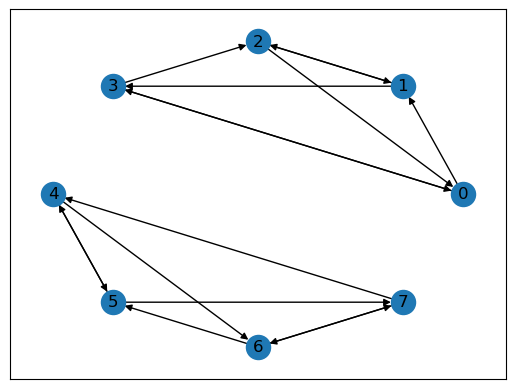

In [20]:
names_of_lines = ["1lin", "2lin", "3lin", "4lin", "5lin", "6lin", "7lin", "8lin"]
T = 2
for i in range(8):
    #формирую ограниения по стокам матрицы лямбд и неизвестных
    #print (names_of_lines[i])
    n_model_6 += (unknown[i * 8 + 0] + unknown[i * 8 + 1] +
              unknown[i * 8 + 2] + unknown[i * 8 + 3] + 
              unknown[i * 8 + 4] + unknown[i * 8 + 5] + 
              unknown[i * 8 + 6] + unknown[i * 8 + 7] == T, names_of_lines[i])
    
names_of_columns = ["1co", "2co", "3co", "4co", "5co", "6co", "7co", "8co"]

for i in range(8):
    #формирую ограниения по стокам матрицы лямбд и неизвестных
    #print (names_of_lines[i])
    n_model_6 += (unknown[0 * 8 + i] + unknown[1 * 8 + i] +
              unknown[2 * 8 + i] + unknown[3 * 8 + i] + 
              unknown[4 * 8 + i] + unknown[5 * 8 + i] + 
              unknown[6 * 8 + i] + unknown[7 * 8 + i] == T, names_of_columns[i])
    
for i in range(64):
    n_model_6 += (unknown[i] <= 1)
    n_model_6 += (unknown[i] >= 0)
    
n_obj_func_6 = (matrix_6[0][0] * unknown[0] + matrix_6[0][1] * unknown[1] + 
              matrix_6[0][2] * unknown[2] + matrix_6[0][3] * unknown[3] + 
              matrix_6[0][4] * unknown[4] + matrix_6[0][5] * unknown[5] + 
              matrix_6[0][6] * unknown[6] + matrix_6[0][7] * unknown[7] +
              matrix_6[1][0] * unknown[8] + matrix_6[1][1] * unknown[9] + 
              matrix_6[1][2] * unknown[10] + matrix_6[1][3] * unknown[11] + 
              matrix_6[1][4] * unknown[12] + matrix_6[1][5] * unknown[13] + 
              matrix_6[1][6] * unknown[14] + matrix_6[1][7] * unknown[15] +
              matrix_6[2][0] * unknown[16] + matrix_6[2][1] * unknown[17] +
              matrix_6[2][2] * unknown[18] + matrix_6[2][3] * unknown[19] + 
              matrix_6[2][4] * unknown[20] + matrix_6[2][5] * unknown[21] + 
              matrix_6[2][6] * unknown[22] + matrix_6[2][7] * unknown[23] +
              matrix_6[3][0] * unknown[24] + matrix_6[3][1] * unknown[25] +
              matrix_6[3][2] * unknown[26] + matrix_6[3][3] * unknown[27] + 
              matrix_6[3][4] * unknown[28] + matrix_6[3][5] * unknown[29] + 
              matrix_6[3][6] * unknown[30] + matrix_6[3][7] * unknown[31] +
              matrix_6[4][0] * unknown[32] + matrix_6[4][1] * unknown[33] +
              matrix_6[4][2] * unknown[34] + matrix_6[4][3] * unknown[35] + 
              matrix_6[4][4] * unknown[36] + matrix_6[4][5] * unknown[37] + 
              matrix_6[4][6] * unknown[38] + matrix_6[4][7] * unknown[39] +
              matrix_6[5][0] * unknown[40] + matrix_6[5][1] * unknown[41] +
              matrix_6[5][2] * unknown[42] + matrix_6[5][3] * unknown[43] + 
              matrix_6[5][4] * unknown[44] + matrix_6[5][5] * unknown[45] + 
              matrix_6[5][6] * unknown[46] + matrix_6[5][7] * unknown[47] +
              matrix_6[6][0] * unknown[48] + matrix_6[6][1] * unknown[49] +
              matrix_6[6][2] * unknown[50] + matrix_6[6][3] * unknown[51] + 
              matrix_6[6][4] * unknown[52] + matrix_6[6][5] * unknown[53] + 
              matrix_6[6][6] * unknown[54] + matrix_6[6][7] * unknown[55] +
              matrix_6[7][0] * unknown[56] + matrix_6[7][1] * unknown[57] +
              matrix_6[7][2] * unknown[58] + matrix_6[7][3] * unknown[59] + 
              matrix_6[7][4] * unknown[60] + matrix_6[7][5] * unknown[61] + 
              matrix_6[7][6] * unknown[62] + matrix_6[7][7] * unknown[63])

n_model_6 += n_obj_func_6

status = n_model_6.solve()

m_edges = list()

k = 0;
for var in n_model_6.variables():
    print(f"{var.name}: {var.value()}", end = ' ')
    if (var.value() == 1.0):
        pair = (k // 8, k % 8)
        m_edges.append(pair)
    if ((k + 1) % 8 == 0):
        print("\n")
    k += 1
    
print_graph(m_edges)

В итоге граф получился такой как и ожидалось - граф имеет две компоненты связности, где ребра идут по максимально возможным значениям траффика.